In [1]:
# Machine Learning Model for 'Geld ausgegeben' prediction over other parameters of Einkaufsstatistik

# Importing the libraries

# Load numpy
import numpy as np

# Load pandas
import pandas as pd

# Plotting library
import seaborn as sns
import matplotlib.pyplot as plt

# sklearn library
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# render plots in jupyter notebook
%matplotlib inline

In [2]:
# Importing the dataset
dataset = pd.read_csv('Preprocessed_data.csv')

In [3]:
# Modelling

# X and y arrays
X = dataset[['Geschlecht', 'Berufskategorie', 'Produkt_Kategorie_1', 'Produkt_Kategorie_2', 'Produkt_Kategorie_3', '0-17', '51-55', 'A', 'B']]
y = dataset['Geld_ausgegeben']

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

# Creating and Training the Model
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0) 
regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

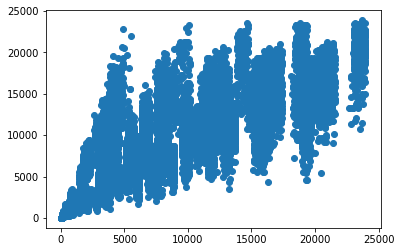

In [4]:
# Predictions from our Model
predictions = regressor.predict(X_test)
plt.scatter(y_test,predictions)

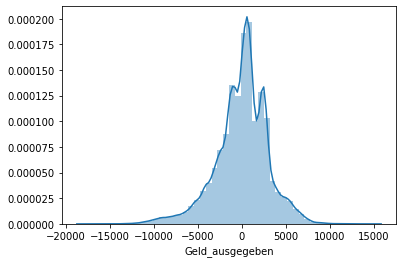

In [5]:
sns.distplot((y_test-predictions),bins=50);

In [6]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R2_Score:', metrics.r2_score(y_test, predictions))

MAE: 2217.4922446753963
MSE: 8894338.630874962
RMSE: 2982.3377794735056
R2_Score: 0.6476958057225527
